In [1]:
print("Hello World")

Hello World


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Converting categorical variable to binary using label encoder(One hot encoding)

In [8]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


### Feature Selection

In [11]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
x = df[features]
y = df['Exited']

### Split data into testing and training groups.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

80% is uses as testing data 20% is used for testing


### Feature scaling, This helps to make sure that all the data are in standard scale, Useful fro ML model to do it job accurately.

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### RandomForestClassifier

In [18]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred = model1.predict(x_test)

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [21]:
print(conf_matrix)

[[1550   57]
 [ 208  185]]


In [22]:
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [23]:
print(accuracy)

0.8675


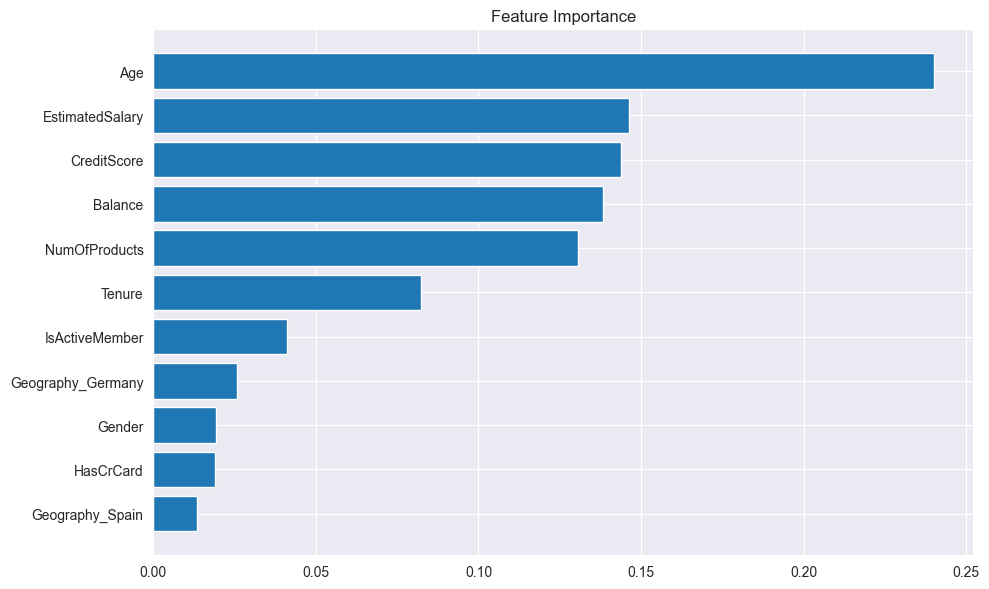

In [24]:

importances = model1.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Use feature names based on sorted indices
names = [features[i] for i in indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), names)
plt.gca().invert_yaxis()  # So the most important feature is on top
plt.tight_layout()
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Build and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(x_test)

# Evaluate the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Print the evaluation results
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("\nClassification Report:\n", class_report_log_reg)
print("\nAccuracy Score:", accuracy_log_reg)

Confusion Matrix:
 [[1543   64]
 [ 314   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Accuracy Score: 0.811


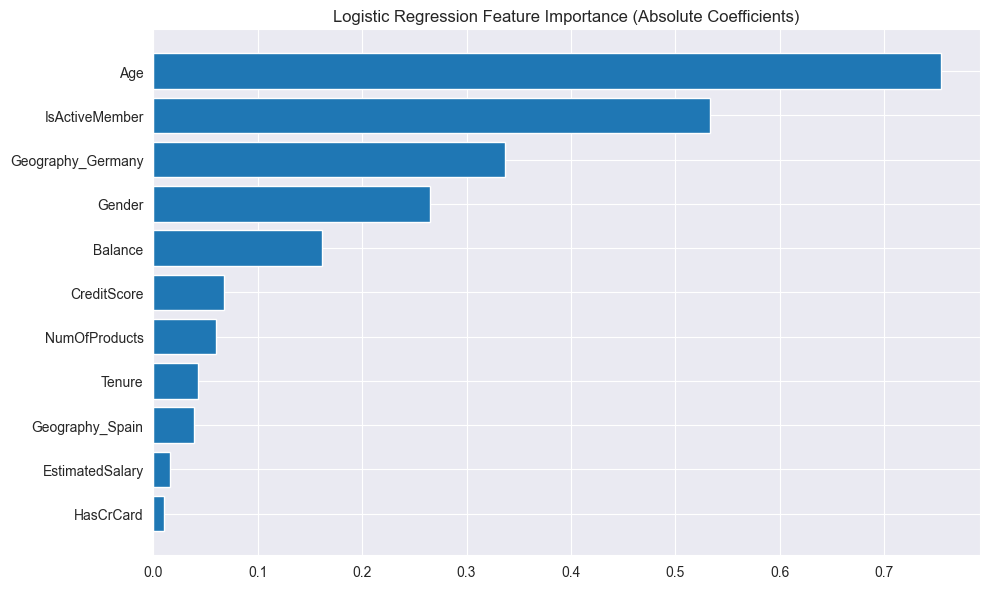

In [27]:
# Get absolute coefficient values as "importance"
importances = np.abs(log_reg.coef_[0])
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Use feature names based on sorted indices
names = [features[i] for i in indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Logistic Regression Feature Importance (Absolute Coefficients)")
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), names)
plt.gca().invert_yaxis()  # So the most important feature is on top
plt.tight_layout()
plt.show()

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Build and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(x_test)

# Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print results
print("Confusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", class_report_svm)
print("\nAccuracy Score:", accuracy_svm)

Confusion Matrix:
 [[1607    0]
 [ 393    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000


Accuracy Score: 0.8035


/Users/nitin/Desktop/CustomerChurnPrediction/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/nitin/Desktop/CustomerChurnPrediction/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/nitin/Desktop/CustomerChurnPrediction/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Build and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change 5 to any k-value
knn_model.fit(x_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print results
print("Confusion Matrix:\n", conf_matrix_knn)
print("\nClassification Report:\n", class_report_knn)
print("\nAccuracy Score:", accuracy_knn)

Confusion Matrix:
 [[1514   93]
 [ 247  146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000


Accuracy Score: 0.83


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Build and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(x_test)

# Evaluate the model
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Print results
print("Confusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", class_report_gb)
print("\nAccuracy Score:", accuracy_gb)

Confusion Matrix:
 [[1543   64]
 [ 201  192]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Accuracy Score: 0.8675


In [33]:
### Predict churn for custom test data using Gradient Boosting model
sample_data = pd.DataFrame([{
    'CreditScore': 600,
    'Gender': 1,  # 1 = Male
    'Age': 40,
    'Tenure': 3,
    'Balance': 75000.0,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 50000.0,
    'Geography_Germany': 1,
    'Geography_Spain': 0
}])

# Apply same scaling as training data
sample_scaled = scaler.transform(sample_data)

# Predict using trained Gradient Boosting model
predicted_label = gb_model.predict(sample_scaled)
print("Churn Prediction (1 = Yes, 0 = No):", predicted_label[0])

Churn Prediction (1 = Yes, 0 = No): 0


In [35]:
### Predict churn for custom test data using Gradient Boosting model
sample_data = pd.DataFrame([{
    'CreditScore': 600,
    'Gender': 1,  # 1 = Male
    'Age': 40,
    'Tenure': 3,
    'Balance': 75000.0,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 50000.0,
    'Geography_Germany': 1,
    'Geography_Spain': 0
}])

# Apply same scaling as training data
sample_scaled = scaler.transform(sample_data)

# Predict using trained Gradient Boosting model
predicted_label = gb_model.predict(sample_scaled)
print("Churn Prediction (1 = Yes, 0 = No):", predicted_label[0])

Churn Prediction (1 = Yes, 0 = No): 0


In [36]:
# Predict churn for high-risk customer
sample_data = pd.DataFrame([{
    'CreditScore': 450,             # Low credit score
    'Gender': 1,                    # Male
    'Age': 58,                      # Older age
    'Tenure': 9,                    # Long tenure
    'Balance': 120000.0,           # High balance
    'NumOfProducts': 2,            # Multiple products
    'HasCrCard': 1,                # Has a credit card
    'IsActiveMember': 0,           # Inactive member
    'EstimatedSalary': 60000.0,    # Medium salary
    'Geography_Germany': 1,        # Higher churn region
    'Geography_Spain': 0           # Not Spain
}])

# Apply same scaling as training data
sample_scaled = scaler.transform(sample_data)

# Predict using trained Gradient Boosting model
predicted_label = gb_model.predict(sample_scaled)
print("Churn Prediction (1 = Yes, 0 = No):", predicted_label[0])

Churn Prediction (1 = Yes, 0 = No): 1
